<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

In [3]:
# Making non-binary values binary
yes_no_mapping = {'yes': 1, 'no': 0}
furnishing_mapping = {'furnished': 1, 'semi-furnished': 0, 'unfurnished': 0}
yes_no_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnishing_columns = ['furnishingstatus']
housing[yes_no_columns] = housing[yes_no_columns].applymap(yes_no_mapping.get)
housing[furnishing_columns] = housing[furnishing_columns].applymap(furnishing_mapping.get)

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [5]:
#X1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
X1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y1 = housing['price'].values.reshape(-1,1)
#y1 = housing['price']

In [6]:
print("nan:", housing.isna().sum().sum())

nan: 0


In [7]:
from sklearn.model_selection import train_test_split
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_val_scaled = scaler.transform(X1_val)

X_train_tensor = torch.tensor(X1_train_scaled, dtype = torch.float32)
X_val_tensor = torch.tensor(X1_val_scaled, dtype = torch.float32)

In [9]:
y_train_tensor = torch.tensor(y1_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y1_val, dtype=torch.float32)

Problem 1a: 1 hidden layer

In [10]:
model = nn.Sequential(
    nn.Linear(X1_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 1)
)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [11]:
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, y_train, X_val, y_val):
    train_losses = []
    val_losses = []

    for epoch in range(1, n_epochs + 1):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)

        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.detach().item())
        val_losses.append(val_loss.detach().item())


        if epoch == 1 or epoch % 100 == 0:
            print(f"Epoch {epoch}, Training loss {loss.item():.4f}, Validation loss {val_loss.item():.4f}")

    return train_losses, val_losses

# Model
train_losses1, val_losses1 = training_loop(
    n_epochs = 10000,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    X_train = X_train_tensor,
    y_train = y_train_tensor,
    X_val = X_val_tensor,
    y_val = y_val_tensor
)

Epoch 1, Training loss 26469982011392.0000, Validation loss 25189244993536.0000
Epoch 100, Training loss 23793540005888.0000, Validation loss 22575933554688.0000
Epoch 200, Training loss 21473875984384.0000, Validation loss 20351033540608.0000
Epoch 300, Training loss 19471613820928.0000, Validation loss 18452622344192.0000
Epoch 400, Training loss 17729931182080.0000, Validation loss 16814576762880.0000
Epoch 500, Training loss 16206251687936.0000, Validation loss 15388901376000.0000
Epoch 600, Training loss 14867436142592.0000, Validation loss 14139549286400.0000
Epoch 700, Training loss 13686859104256.0000, Validation loss 13038604255232.0000
Epoch 800, Training loss 12642636791808.0000, Validation loss 12063889948672.0000
Epoch 900, Training loss 11716494622720.0000, Validation loss 11197441114112.0000
Epoch 1000, Training loss 10892972392448.0000, Validation loss 10424451858432.0000
Epoch 1100, Training loss 10158897889280.0000, Validation loss 9732567859200.0000
Epoch 1200, Train

Problem 1b: 2 hidden layers

In [12]:
model1 = nn.Sequential(
    nn.Linear(X1_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 64),
    nn.Tanh(),
    nn.Linear(64, 16),
    nn.Tanh(),
    nn.Linear(16, 1)
)

In [13]:
optimizer1 = optim.SGD(model1.parameters(), lr=0.0001)


train_losses2, val_losses2 = training_loop(
    n_epochs = 10000,
    optimizer = optimizer1,  # Use the new optimizer
    model = model1,
    loss_fn = loss_fn,
    X_train = X_train_tensor,
    y_train = y_train_tensor,
    X_val = X_val_tensor,
    y_val = y_val_tensor
)

Epoch 1, Training loss 26469982011392.0000, Validation loss 25189244993536.0000
Epoch 100, Training loss 17437284106240.0000, Validation loss 16069396791296.0000
Epoch 200, Training loss 12563055116288.0000, Validation loss 11155606077440.0000
Epoch 300, Training loss 10028889145344.0000, Validation loss 8607126519808.0000
Epoch 400, Training loss 8705097072640.0000, Validation loss 7281063231488.0000
Epoch 500, Training loss 8007434371072.0000, Validation loss 6586638532608.0000
Epoch 600, Training loss 7633726078976.0000, Validation loss 6218504994816.0000
Epoch 700, Training loss 7427701342208.0000, Validation loss 6018896494592.0000
Epoch 800, Training loss 7308536446976.0000, Validation loss 5906316132352.0000
Epoch 900, Training loss 7234428862464.0000, Validation loss 5838682980352.0000
Epoch 1000, Training loss 7183758000128.0000, Validation loss 5794281553920.0000
Epoch 1100, Training loss 7145339748352.0000, Validation loss 5761911488512.0000
Epoch 1200, Training loss 7113386

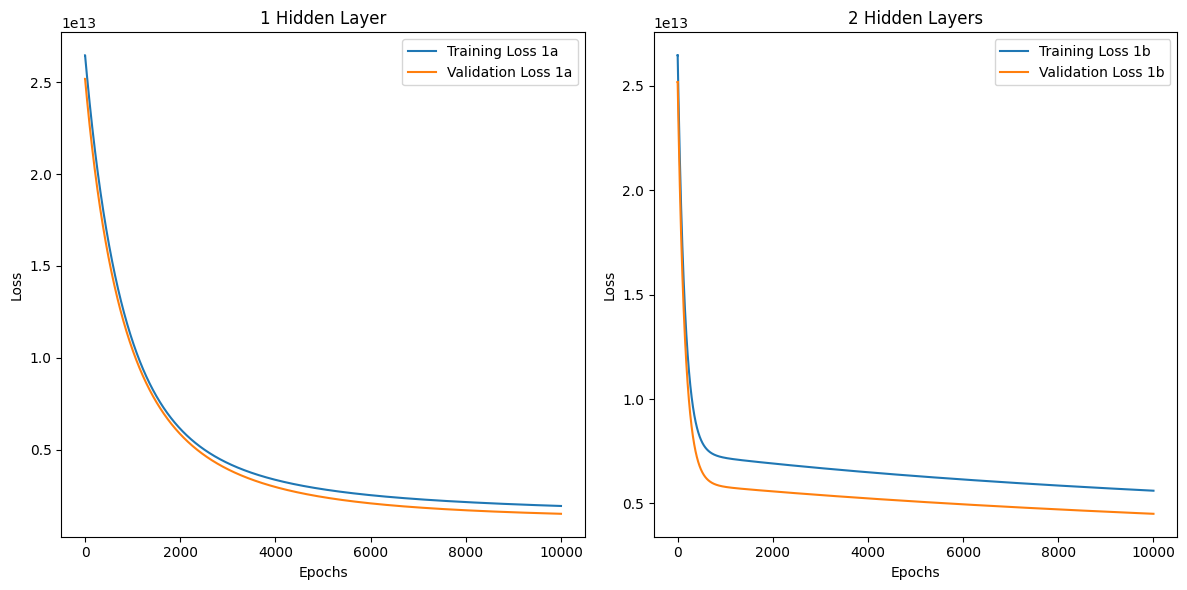

In [14]:
epochs = range(1, len(train_losses1) + 1)

plt.figure(figsize=(12, 6))

# Plot training losses
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses1, label='Training Loss 1a')
plt.plot(epochs, val_losses1, label='Validation Loss 1a')
plt.title('1 Hidden Layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation losses
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses2, label='Training Loss 1b')
plt.plot(epochs, val_losses2, label='Validation Loss 1b')
plt.title('2 Hidden Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Problem 2

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Initialize the network and move it to the available device
net = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Load and normalize CIFAR-10 data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


Using device: cuda


100%|██████████| 170498071/170498071 [00:02<00:00, 82292981.35it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [18]:
start_time = time.time()
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, loss: {running_loss / len(trainloader)}')

end_time = time.time()
training_time = end_time - start_time
print('Finished Training. Training time: ', training_time)

# Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy} %')

Epoch 1, loss: 1.6483774912047386
Epoch 2, loss: 1.478984389115572
Epoch 3, loss: 1.4012097248208524
Epoch 4, loss: 1.3401168822801113
Epoch 5, loss: 1.2896742869858444
Epoch 6, loss: 1.2412346070174873
Epoch 7, loss: 1.1989223250210286
Epoch 8, loss: 1.161149325465858
Epoch 9, loss: 1.1155157872721553
Epoch 10, loss: 1.0794681141794473
Epoch 11, loss: 1.049478660664931
Epoch 12, loss: 1.0158954203476012
Epoch 13, loss: 0.9851593758789263
Epoch 14, loss: 0.9493448572887853
Epoch 15, loss: 0.912077403362171
Epoch 16, loss: 0.8902814930696972
Epoch 17, loss: 0.8727253444608674
Epoch 18, loss: 0.8373177873513242
Epoch 19, loss: 0.8061966241453355
Epoch 20, loss: 0.7887192361011403
Epoch 21, loss: 0.7712048922755464
Epoch 22, loss: 0.748119915389127
Epoch 23, loss: 0.7219858938157193
Epoch 24, loss: 0.7178186237221179
Epoch 25, loss: 0.6954236671860405
Epoch 26, loss: 0.6738777561883611
Epoch 27, loss: 0.6437489893078107
Epoch 28, loss: 0.6471781755762975
Epoch 29, loss: 0.6388632356823768